In [1]:
library("ggplot2")
library("readxl")

In [31]:
options(repr.plot.width=15, repr.plot.height=8)

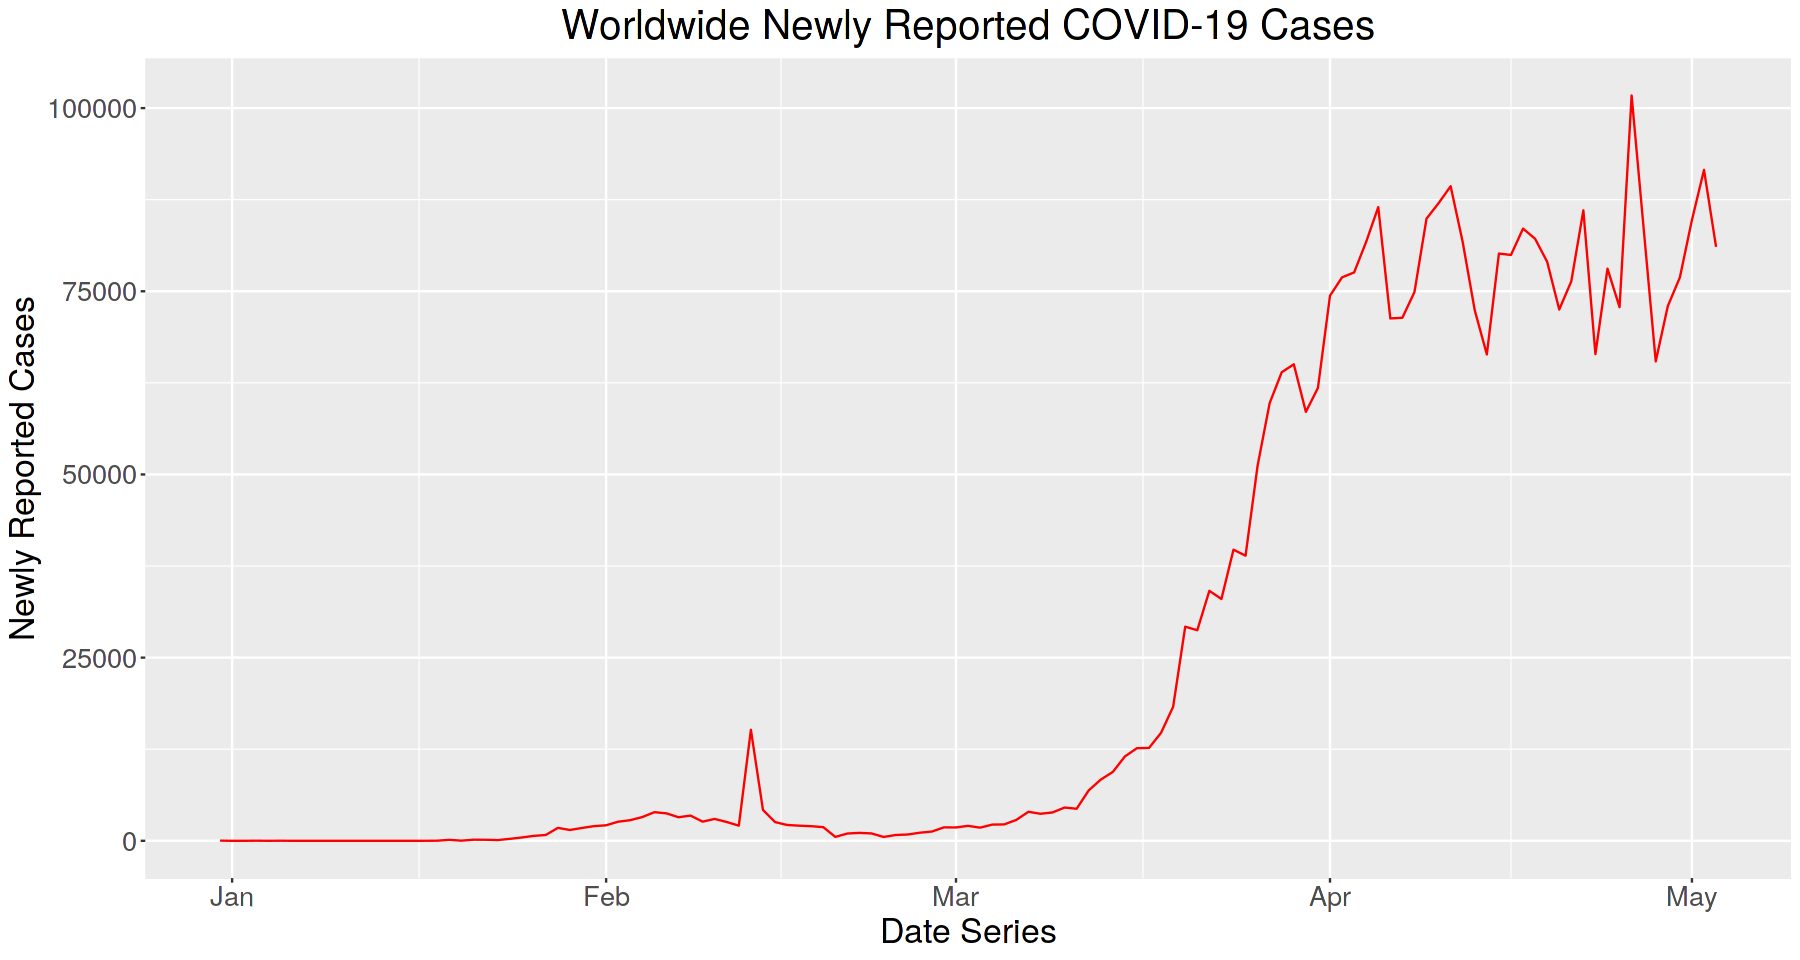

In [38]:
covid<-data.frame(read_excel("../input/covid19may3.xlsx"))
val<-paste(covid$year,"-",covid$month,"-",covid$day,sep = "")
covid$dateRep<-val
covid$dateRep<-as.Date(covid$dateRep)

total_cases_by_date<-aggregate(covid$cases,by=list(covid$dateRep),FUN=sum)
covid_report_plot<-ggplot(total_cases_by_date,aes(Group.1,x))+geom_line(color="red")
covid_report_plot+ggtitle("Worldwide Newly Reported COVID-19 Cases")+labs(y="Newly Reported Cases", x = "Date Series")+theme(plot.title = element_text(hjust = 0.5))+theme(text = element_text(size=20))  #time-series

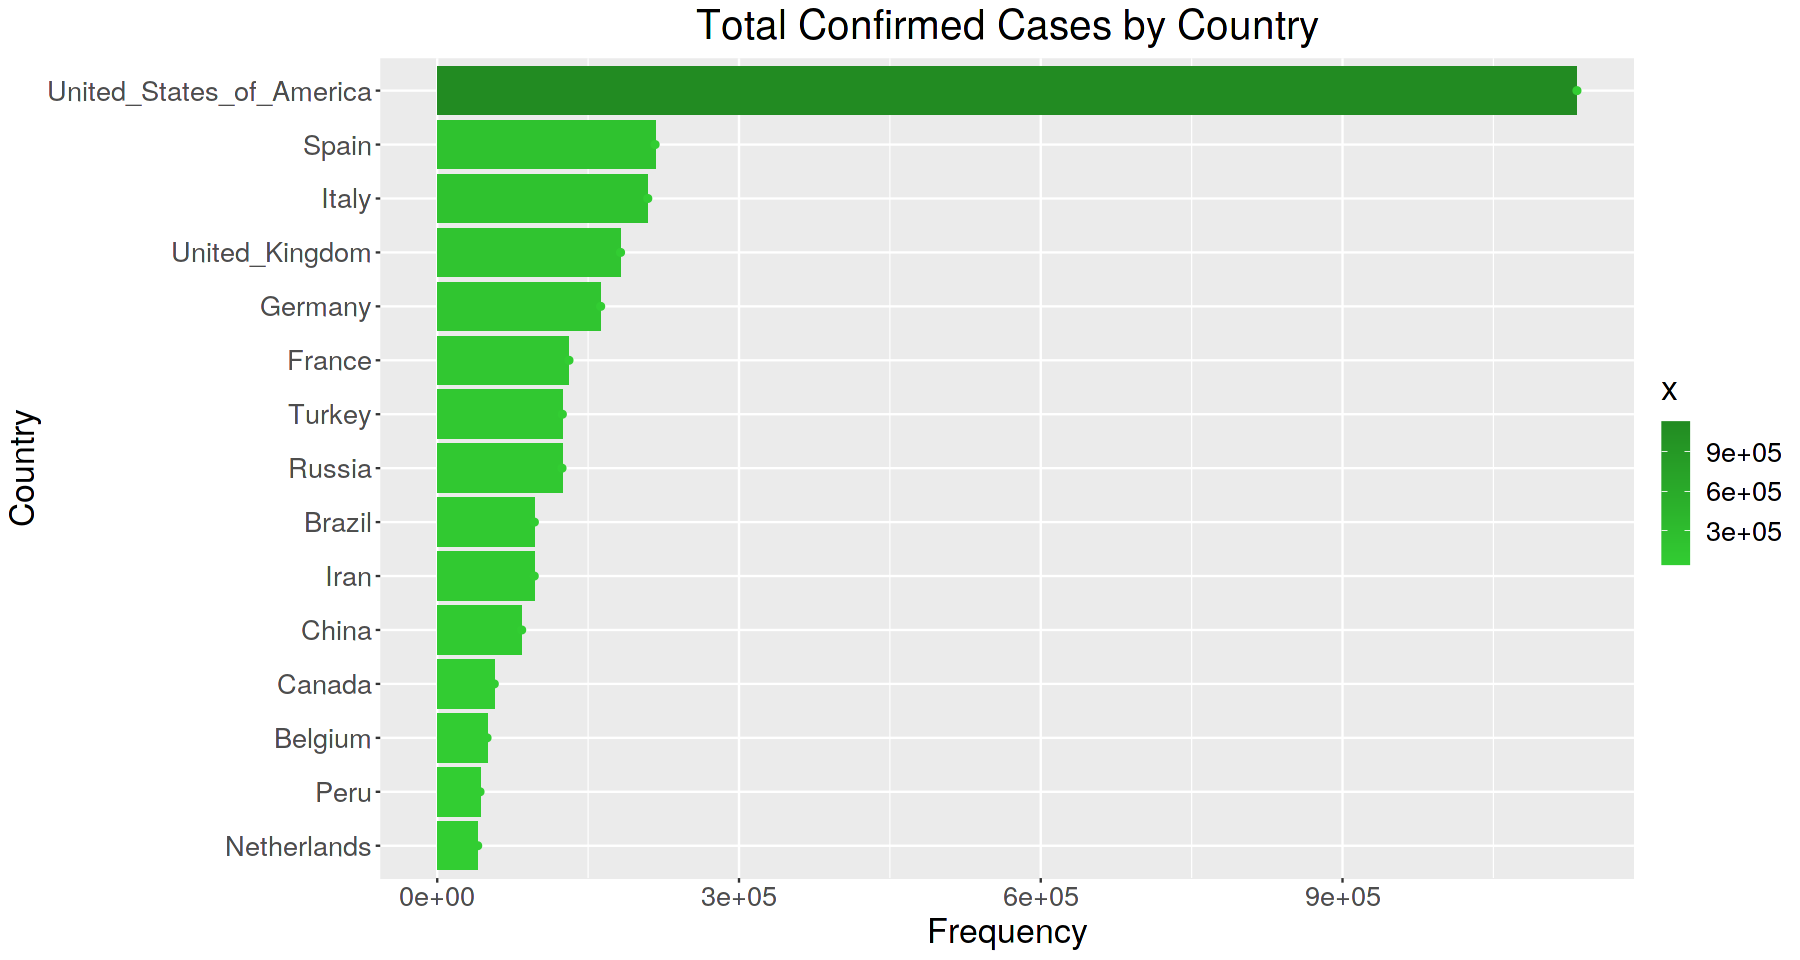

In [33]:
cases_by_country<-aggregate(covid$cases,by=list(covid$countriesAndTerritories),FUN=sum)
cases_by_country<-cases_by_country[order(-cases_by_country$x),]
topcasesbycountries<-head(cases_by_country,15)
covid_cases_by_country_plot<-ggplot(topcasesbycountries,aes(y=x,x=reorder(Group.1,x)))+geom_bar(stat="identity")+geom_col(aes(fill = x))+geom_point(color="limegreen") + scale_fill_gradient(low = "limegreen", high = "forestgreen")+coord_flip()
covid_cases_by_country_plot+ggtitle("Total Confirmed Cases by Country")+labs(x="Country",y="Frequency")+theme(plot.title = element_text(hjust = 0.5))+theme(text = element_text(size=20))

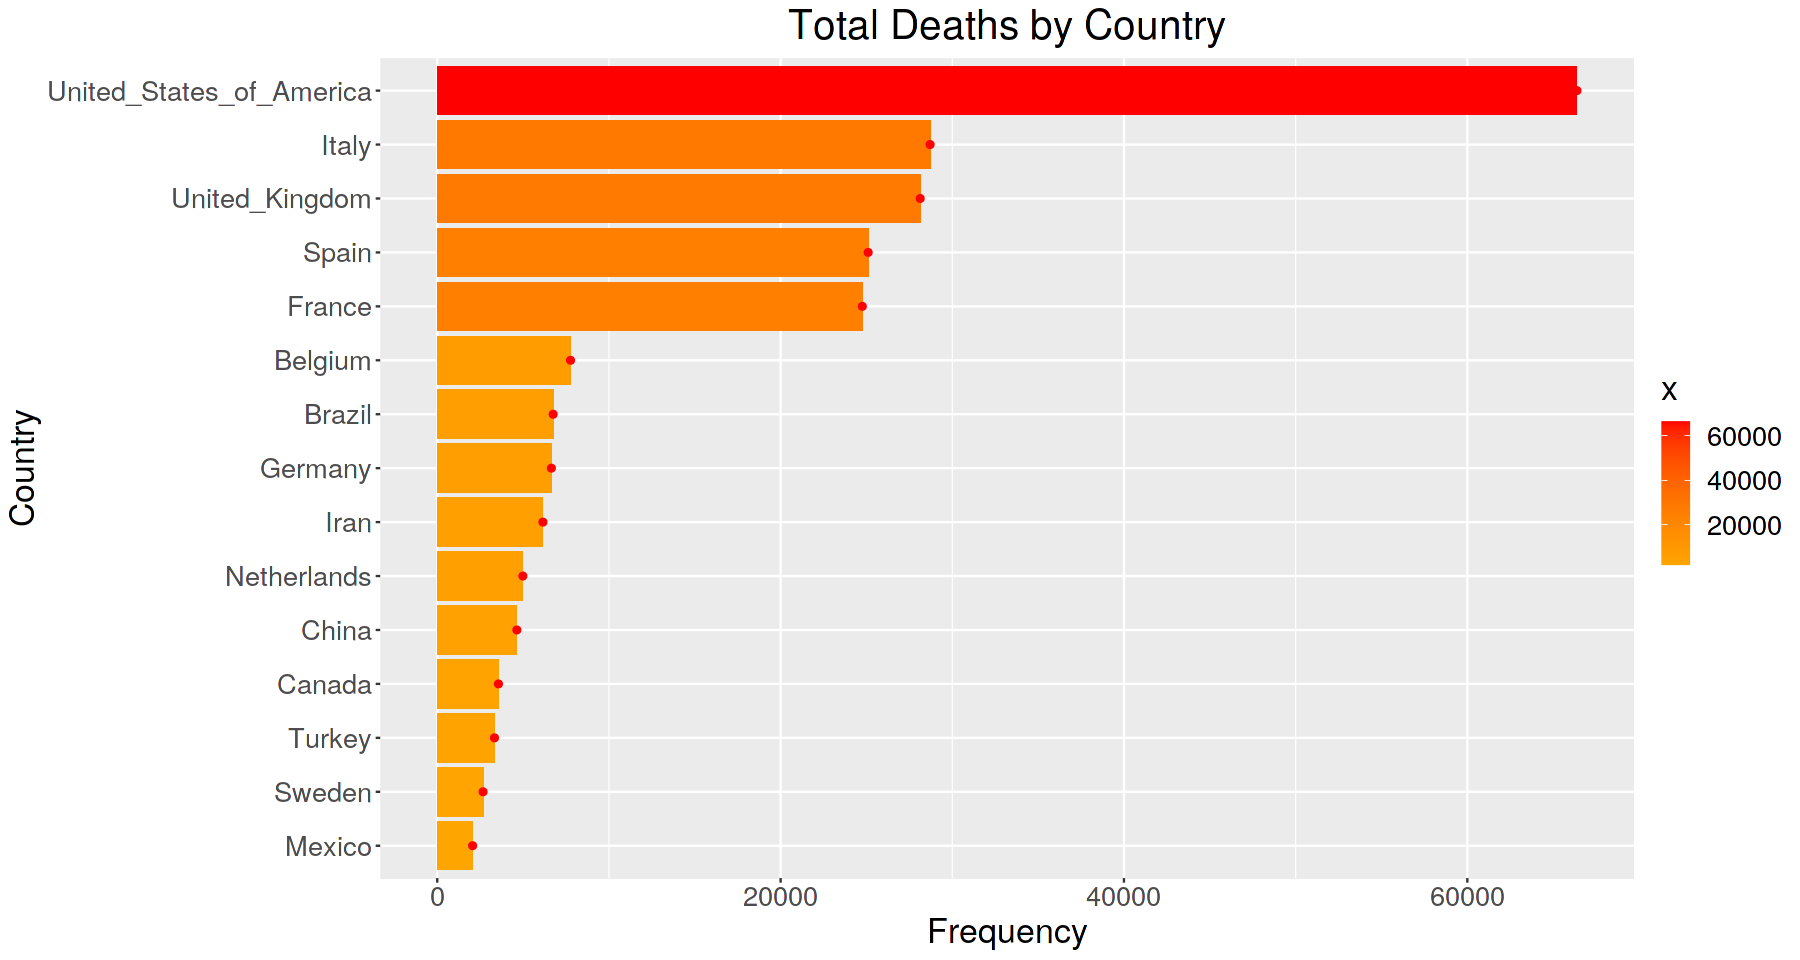

In [36]:
deaths_by_country<-aggregate(covid$deaths,by=list(covid$countriesAndTerritories),FUN=sum)
deaths_by_country<-deaths_by_country[order(-deaths_by_country$x),]
topdeathsbycountries<-head(deaths_by_country,15)
covid_death_by_country_plot<-ggplot(topdeathsbycountries,aes(y=x,x=reorder(Group.1,x)))+geom_bar(stat="identity")+geom_col(aes(fill = x))+geom_point(color="red") + scale_fill_gradient(low = "orange", high = "red")+coord_flip()
covid_death_by_country_plot+ggtitle("Total Deaths by Country")+labs(x="Country",y="Frequency")+theme(plot.title = element_text(hjust = 0.5))+theme(text = element_text(size=20))


### Cases by Country

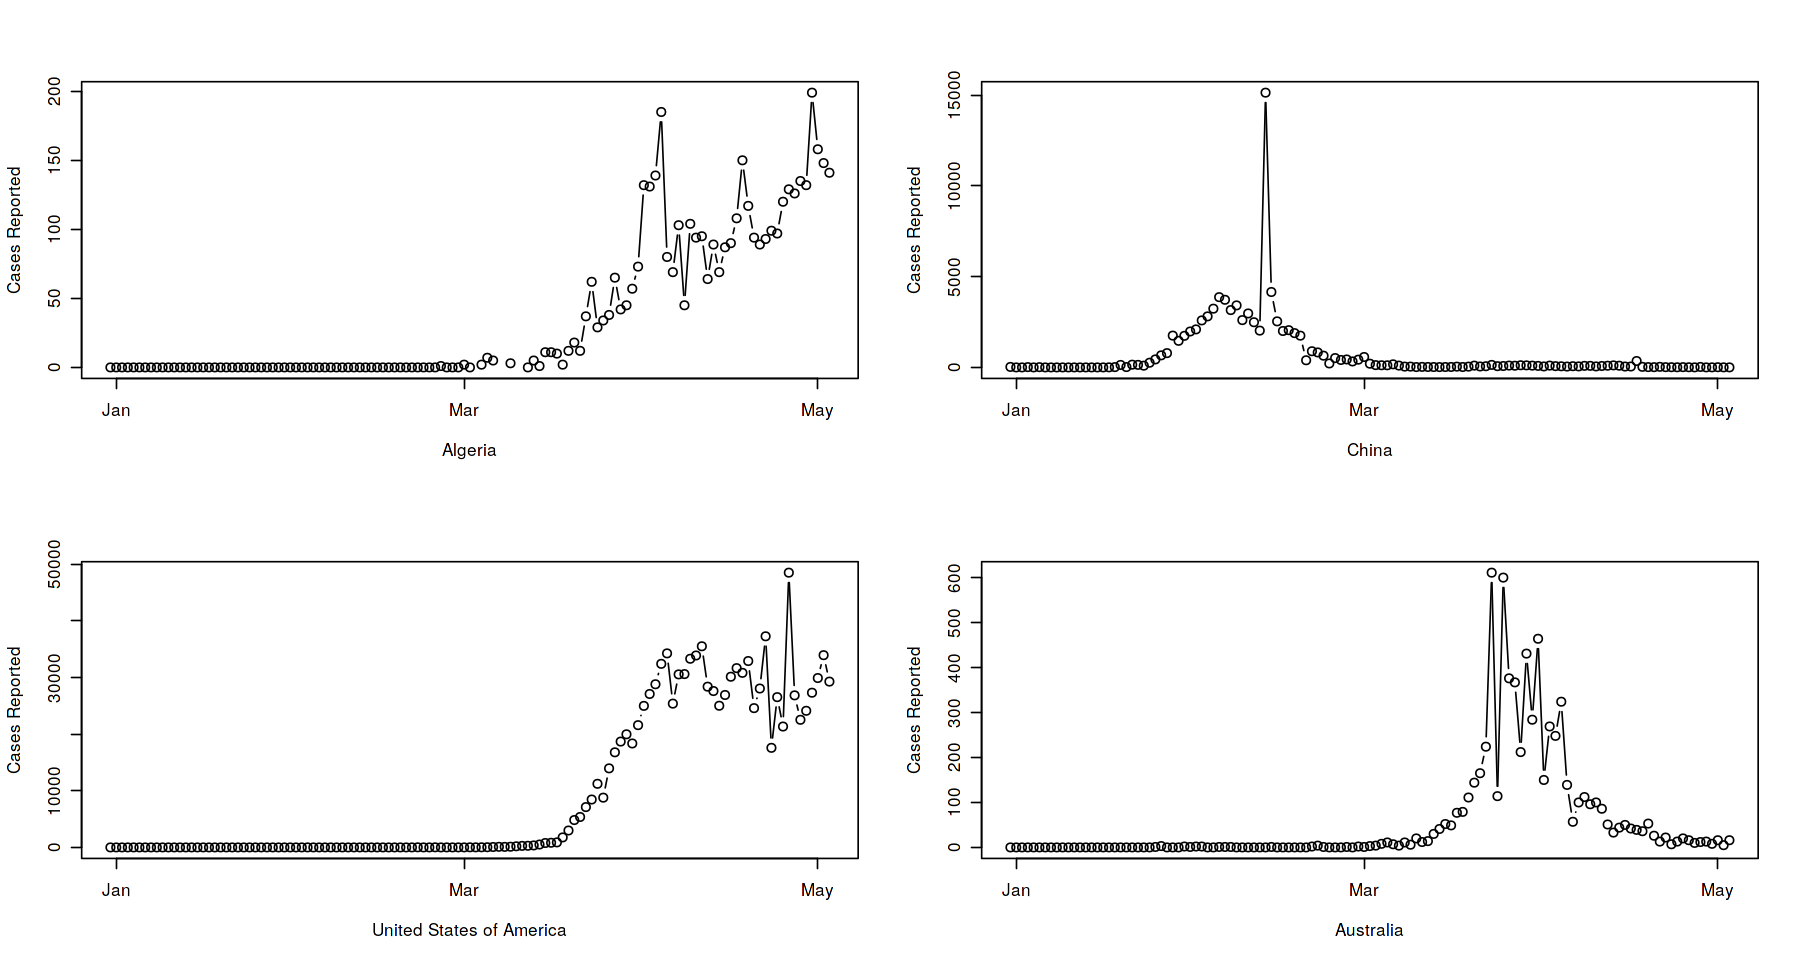

In [39]:
par(mfrow=c(2,2))
covidalg<-covid[covid$countriesAndTerritories=="Algeria",]
total_cases_by_date_algeria<-aggregate(covidalg$cases,by=list(covidalg$dateRep),FUN=sum)
plot(total_cases_by_date_algeria,xlab="Algeria",ylab="Cases Reported",type="b")

covidchina<-covid[covid$countriesAndTerritories=="China",]
total_cases_by_date_china<-aggregate(covidchina$cases,by=list(covidchina$dateRep),FUN=sum)
p2<-plot(total_cases_by_date_china,xlab="China",ylab="Cases Reported",type="b")

covidusa<-covid[covid$countriesAndTerritories=="United_States_of_America",]
total_cases_by_date_usa<-aggregate(covidusa$cases,by=list(covidusa$dateRep),FUN=sum)
p3<-plot(total_cases_by_date_usa,xlab="United States of America",ylab="Cases Reported",type="b")

covidaus<-covid[covid$countriesAndTerritories=="Australia",]
total_cases_by_date_australia<-aggregate(covidaus$cases,by=list(covidaus$dateRep),FUN=sum)
p3<-plot(total_cases_by_date_australia,xlab="Australia",ylab="Cases Reported",type="b")

### Deaths by Country

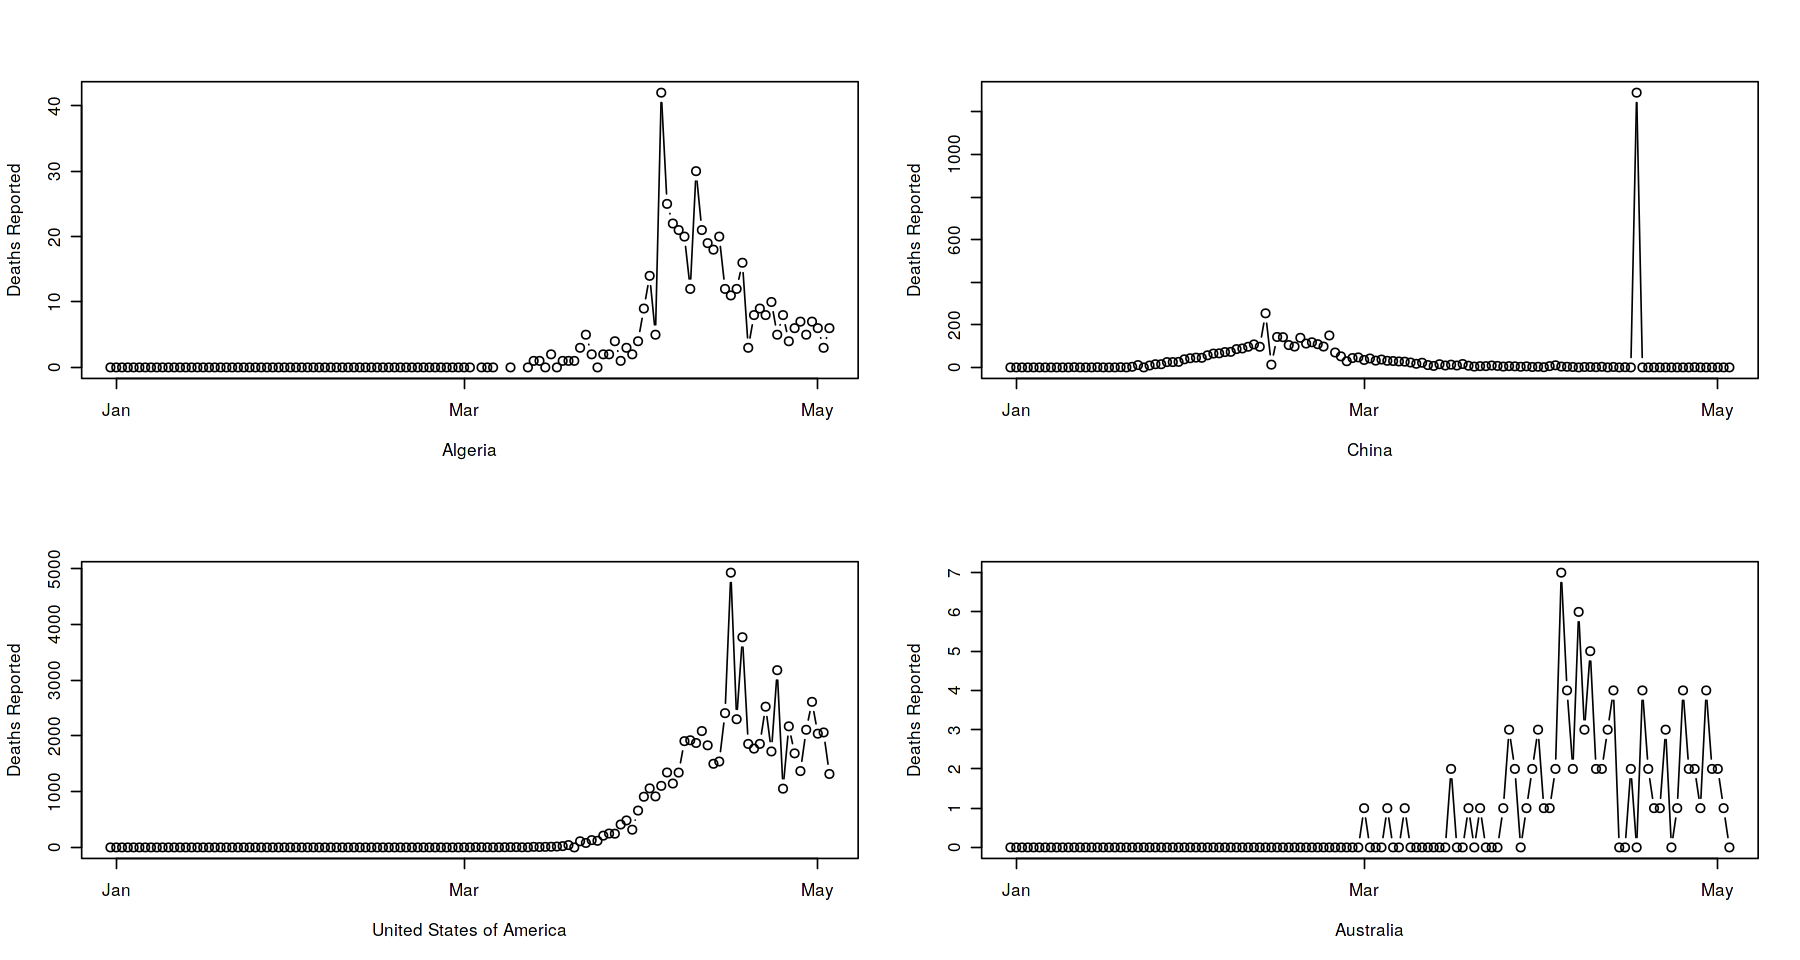

In [40]:
par(mfrow=c(2,2))
covidalg<-covid[covid$countriesAndTerritories=="Algeria",]
total_deaths_by_date_algeria<-aggregate(covidalg$deaths,by=list(covidalg$dateRep),FUN=sum)
plot(total_deaths_by_date_algeria,xlab="Algeria",ylab="Deaths Reported",type="b")

covidchina<-covid[covid$countriesAndTerritories=="China",]
total_deaths_by_date_china<-aggregate(covidchina$deaths,by=list(covidchina$dateRep),FUN=sum)
p2<-plot(total_deaths_by_date_china,xlab="China",ylab="Deaths Reported",type="b")

covidusa<-covid[covid$countriesAndTerritories=="United_States_of_America",]
total_deaths_by_date_usa<-aggregate(covidusa$deaths,by=list(covidusa$dateRep),FUN=sum)
p3<-plot(total_deaths_by_date_usa,xlab="United States of America",ylab="Deaths Reported",type="b")

covidaus<-covid[covid$countriesAndTerritories=="Australia",]
total_deaths_by_date_australia<-aggregate(covidaus$deaths,by=list(covidaus$dateRep),FUN=sum)
p3<-plot(total_deaths_by_date_australia,xlab="Australia",ylab="Deaths Reported",type="b")

### End